In [1]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
path = 'data/refined'
files = os.listdir(path)

metal_artist = []
for df_name in [d for d in files if 'spotify_' in d]:
    df = pd.read_csv(f'{path}/{df_name}')
    metal_artist.append(
        df[df.is_metal_artist == True].copy()
    )
    
metal_artist = pd.concat(metal_artist).reset_index(drop=True)
metal_artist['genres'] = metal_artist['genres'].apply(ast.literal_eval)

In [22]:
mlb = MultiLabelBinarizer().fit(metal_artist['genres'])

df_genres = pd.DataFrame(
    mlb.transform(metal_artist['genres']), 
    columns=mlb.classes_
)

df_genres = (metal_artist
    .merge(df_genres, left_index=True, right_index=True)
)

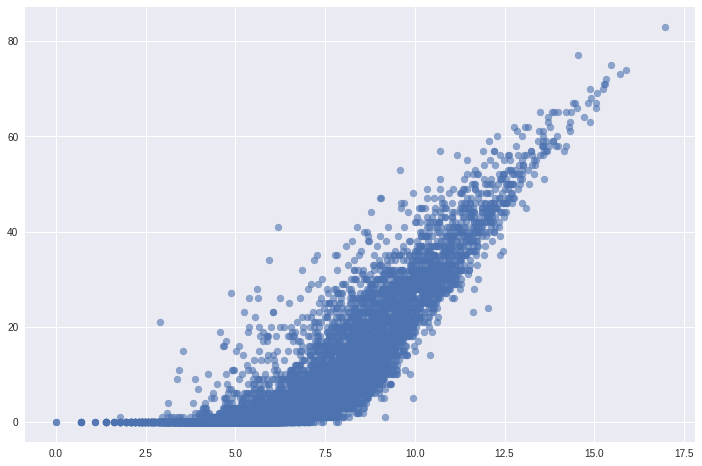

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(
    np.log(metal_artist.followers),
    metal_artist.popularity,
    alpha=.6
);

In [108]:
genre_stats = []
for g in df_genres.iloc[:, 6:].columns:
    df_single_g = df_genres[df_genres[g] == 1]
    genre_stats.append({
        'genre': g,
        'total_bands': df_single_g.shape[0],
        'mean_popularity': df_single_g.popularity.mean(), 
    })

genre_stats = (pd
    .DataFrame(genre_stats)
    .reset_index(drop=True)       
)

In [112]:
genre_stats.sort_values('total_bands', ascending=False).head(15)

,genre,total_bands,mean_popularity
751,metal,166,42.939759
745,melodic metal,162,30.851852
1226,symphonic power metal,137,22.299270
1133,slam death metal,124,11.000000
178,brutal death metal,122,24.500000
1236,technical death metal,114,21.991228
345,death metal,114,34.008772
824,neo classical metal,112,28.812500
977,power metal,109,39.174312
1319,voidgaze,107,20.429907
